In [17]:
def is_nan(x):
    return (x != x)

In [18]:
import numpy as np
import pandas as pd
values = [float('nan'), np.nan, 55, "string", lambda x : x]
for value in values:
  print(f"{repr(value):<8} : {is_nan(value)}")

nan      : True
nan      : True
55       : False
'string' : False
<function <lambda> at 0x0000020B3A70E550> : False


In [19]:
# if float('-inf') < float(num) < float('inf'):

In [20]:
pd.eval(float('-inf') < float('nan') < float('inf'))

False

In [21]:
from math import isnan

Z = ['a','b', float('NaN'), 'd', float('1.1024')]

[x for x in Z if not (
                      type(x) == float # let's drop all float values…
                      and isnan(x) # … but only if they are nan
                      )]


['a', 'b', 'd', 1.1024]

In [22]:
import pandas as pd

import numpy as np

missing_values = [3, None, np.NaN, pd.NA, pd.NaT, '10']

pd.isna(missing_values)

array([False,  True,  True,  True,  True, False])

In [23]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
    'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
    'age': [42, '' , '', '', 73], 
    'sex': ['m', np.nan, 'f', 'm', 'f'], 
    'preTestScore': [4, np.nan, np.nan, 2, 3],
    'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 
    'sex', 'preTestScore', 'postTestScore'])

In [24]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42,m,4.0,25.0
1,NaN,NaN,,NaN,NaN,NaN
2,Tina,Ali,,f,NaN,NaN
3,Jake,Milner,,m,2.0,62.0
4,Amy,Cooze,73,f,3.0,70.0


In [25]:
def missing(dff):
    print("Missing values in %")
    print(round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(df)

Missing values in %
preTestScore     40.0
postTestScore    40.0
first_name       20.0
last_name        20.0
sex              20.0
age               0.0
dtype: float64


In [26]:
df=df.replace({'':np.nan})
df = df.dropna(thresh=0.7*len(df), axis=1)
df

,first_name,last_name,sex
0,Jason,Miller,m
1,NaN,NaN,NaN
2,Tina,Ali,f
3,Jake,Milner,m
4,Amy,Cooze,f


Let's say, you want to drop all the columns having 60% or more missing values 

In [27]:
df = df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>=60))].columns, 1)

C:\Users\sshq2\AppData\Local\Temp\ipykernel_13484\209428473.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>=60))].columns, 1)


In [28]:
df

,first_name,last_name,sex
0,Jason,Miller,m
1,NaN,NaN,NaN
2,Tina,Ali,f
3,Jake,Milner,m
4,Amy,Cooze,f


<Axes: xlabel='Product_Base_Margin'>

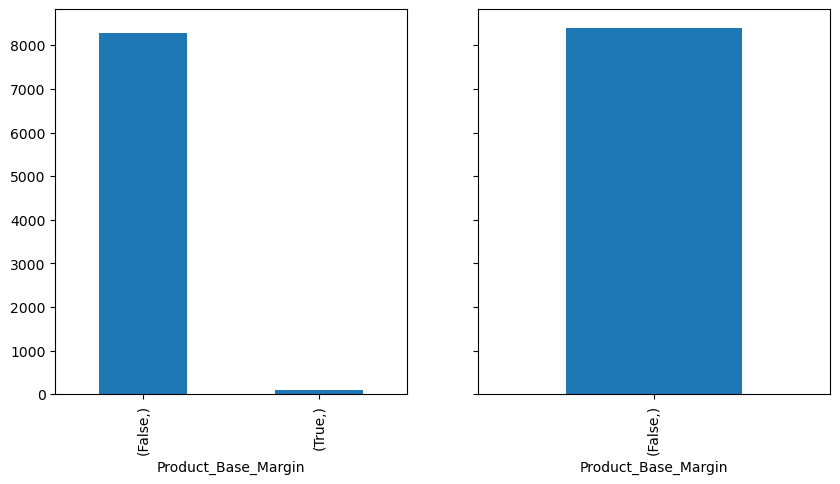

In [29]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://query.data.world/s/Hfu_PsEuD1Z_yJHmGaxWTxvkz7W_b0')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=[10,5],
                      sharey=True, sharex=False)


df.loc[:,"Product_Base_Margin"].isnull().to_frame().value_counts().plot(ax=ax[0], kind="bar")
df.loc[:,"Product_Base_Margin"].fillna(df.loc[:,"Product_Base_Margin"].mean(), inplace=True)
df.loc[:,"Product_Base_Margin"].isnull().to_frame().value_counts().plot(ax=ax[1], kind="bar")

In [30]:
df

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23.0,-30.51,3.60,0.560000
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13.0,4.56,0.93,0.540000
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26.0,1148.90,2.50,0.590000
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43.0,729.34,14.30,0.370000
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35.0,1219.87,26.30,0.380000
...,...,...,...,...,...,...,...,...,...,...
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,NaN,NaN,NaN,NaN,NaN,0.512481
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,NaN,NaN,NaN,NaN,NaN,0.512481
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,NaN,NaN,NaN,NaN,NaN,0.512481
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,NaN,NaN,NaN,NaN,NaN,0.512481


In [31]:
missing(df)

Missing values in %
Discount               0.65
Order_Quantity         0.65
Profit                 0.65
Shipping_Cost          0.65
Sales                  0.24
Ord_id                 0.00
Prod_id                0.00
Ship_id                0.00
Cust_id                0.00
Product_Base_Margin    0.00
dtype: float64


In [32]:
df.to_csv('../../../data/input/dataworld_sales.csv')